<center> <font size='6' font-weight='bold'> Nettoyage des données </font> </center>

**Description :** Notebook servant au nettoyage des données.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-des-données" data-toc-modified-id="Import-des-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import des données</a></span><ul class="toc-item"><li><span><a href="#Informations-générales" data-toc-modified-id="Informations-générales-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Informations générales</a></span></li><li><span><a href="#Lecture-des-CSV" data-toc-modified-id="Lecture-des-CSV-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Lecture des CSV</a></span></li><li><span><a href="#Filtrage-par-noeud" data-toc-modified-id="Filtrage-par-noeud-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Filtrage par noeud</a></span></li></ul></li><li><span><a href="#Nettoyage-des-données" data-toc-modified-id="Nettoyage-des-données-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Nettoyage des données</a></span><ul class="toc-item"><li><span><a href="#NaN" data-toc-modified-id="NaN-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>NaN</a></span></li><li><span><a href="#Conversion-en-datetime64" data-toc-modified-id="Conversion-en-datetime64-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Conversion en datetime64</a></span></li></ul></li><li><span><a href="#Analyse-et-visualisation-(partie-1)" data-toc-modified-id="Analyse-et-visualisation-(partie-1)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analyse et visualisation (partie 1)</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature engineering</a></span><ul class="toc-item"><li><span><a href="#Categorical-variables" data-toc-modified-id="Categorical-variables-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Categorical variables</a></span></li><li><span><a href="#Features-liées-aux-timestamp" data-toc-modified-id="Features-liées-aux-timestamp-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Features liées aux timestamp</a></span></li><li><span><a href="#Périodes-de-vacances" data-toc-modified-id="Périodes-de-vacances-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Périodes de vacances</a></span></li><li><span><a href="#Confinement" data-toc-modified-id="Confinement-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Confinement</a></span></li><li><span><a href="#Couvre-feu" data-toc-modified-id="Couvre-feu-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Couvre-feu</a></span></li><li><span><a href="#Jours-fériés" data-toc-modified-id="Jours-fériés-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Jours fériés</a></span></li><li><span><a href="#Vacances-scolaires" data-toc-modified-id="Vacances-scolaires-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Vacances scolaires</a></span></li><li><span><a href="#Temps-avant-les-prochaines-grandes-vacances-scolaires" data-toc-modified-id="Temps-avant-les-prochaines-grandes-vacances-scolaires-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Temps avant les prochaines grandes vacances scolaires</a></span></li><li><span><a href="#Données-météorologiques" data-toc-modified-id="Données-météorologiques-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>Données météorologiques</a></span></li></ul></li><li><span><a href="#Analyse-et-visualisation-(partie-2)" data-toc-modified-id="Analyse-et-visualisation-(partie-2)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analyse et visualisation (partie 2)</a></span></li><li><span><a href="#Export-train-/-dev-/-test" data-toc-modified-id="Export-train-/-dev-/-test-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Export train / dev / test</a></span></li></ul></div>

In [40]:
import os
import datetime

from functools import reduce

import numpy as np
import pandas as pd

import seaborn as sns

Les données sont enregistrées dans 3 fichiers CSV différents. Elles portent le nom suivant :

In [41]:
data_path = './data'

In [42]:
os.listdir(path=data_path)

['convention.csv',
 '.DS_Store',
 'daily_weather_data_from_2009_to_present.pkl',
 'champs-elysees.csv',
 'jours_feries_metropole.csv',
 'fr-en-calendrier-scolaire.csv',
 'champs-elysees-cleaned.pkl',
 'combined_weather_data_from_2009_to_present.pkl',
 'sts.csv']

In [43]:
list_filenames = ['champs-elysees.csv', 'convention.csv', 'sts.csv']

# Import des données

## Informations générales

**Les données  ont été téléchargées depuis :**  
- https://opendata.paris.fr/explore/dataset/comptages-routiers-permanents/information/?disjunctive.libelle&disjunctive.etat_trafic&disjunctive.libelle_nd_amont&disjunctive.libelle_nd_aval&sort=t_1h  
  
**Lien de la notice d'obtention des features :**  
- https://opendata.paris.fr/api/datasets/1.0/comptages-routiers-permanents/attachments/notice_donnes_trafic_capteurs_permanents_version_20190607_pdf/  
  
**Quelques infos issues du site sur le dataset:**  
>**Données de trafic routier issues des capteurs permanents sur 13 mois glissants en J-1**  
Sur le réseau parisien, la mesure du trafic s’effectue majoritairement par le biais de boucles électromagnétiques implantés dans la chaussée.  
La donnée est produite par la Direction de la Voirie et des déplacements - Service des Déplacements - Poste Central d'Exploitation Lutèce.  
La donnée et les visualisations associées (Tableau, Carte et Dataviz) sont brutes sans aucune interprétation ou analyse. Elles donnent à voir la donnée telle qu'elle est publiée quotidiennement. 
Elles donnent un aperçu du taux d'occupation et du débit sur plus de 3000 tronçons de voies. A elles seules, elles ne permettent pas de caractériser la complexité de la circulation à Paris.  
>  
**Deux types de données sont ainsi élaborés :**
le taux d’occupation, qui correspond au temps de présence de véhicules sur la boucle en pourcentage d’un intervalle de temps fixe (une heure pour les données fournies). Ainsi, 25% de taux d’occupation sur une heure signifie que des véhicules ont été présents sur la boucle pendant 15 minutes. Le taux fournit une information sur la congestion routière. L’implantation des boucles est pensée de manière à pouvoir déduire, d’une mesure ponctuelle, l’état du trafic sur un arc.
le débit est le nombre de véhicules ayant passé le point de comptage pendant un intervalle de temps fixe (une heure pour les données fournies).  
L'horodate horaire est effectué en fin de période d'élaboration. 
Par exemple, l’horodate « 2019-01-01 01:00:00 » désigne la période du 1er janvier 2019 à 00h00 au 1er janvier 2019 à 01h00.  
Ainsi, l’observation couplée en un point du taux d’occupation et du débit permet de caractériser le trafic. Cela constitue l’un des fondements de l’ingénierie du trafic, et l’on nomme d’ailleurs cela le « diagramme fondamental ».
Un débit peut correspondre à deux situations de trafic : fluide ou saturée, d’où la nécessité du taux d’occupation. A titre d’exemple : sur une heure, un débit de 100 véhicules par heure sur un axe habituellement très chargé peut se rencontrer de nuit (trafic fluide) ou bien en heure de pointe (trafic saturé).  
>  
**L’équipement du réseau parisien :**  
Les principaux axes de la Ville de Paris sont équipés de stations de comptage des véhicules et de mesure du taux d’occupation, à des fins à la fois de régulation du trafic et des transports en commun, d’information aux usagers (diffusion sur le site Sytadin), et d’étude.
Il existe deux types de stations sur le réseau : les stations de mesure du taux d’occupation seul, et des stations à la fois de mesure du taux et de comptage des véhicules.
Les stations de mesure du taux sont implantées très régulièrement : elles permettent une connaissance fine des conditions de circulation.
Les stations de débit sont moins nombreuses, et généralement implantées entre les principales intersections. En effet, le débit se conserve généralement sur une section entre deux grands carrefours.

## Lecture des CSV

On regroupera toutes les lignes des 3 CSV dans un même DataFrame. Une colonne filename y a été ajoutée pour facilement avoir l'origine de la ligne à portée de main.  
  
Avant tout, nous allons imputer les NaN avec la méthode du *rolling mean*.

In [44]:
window = 14 # modifier si besoin la taille de la fenêtre

l_df = [pd.read_csv(os.path.join(data_path, filename), sep=';', index_col=0).assign(filename=filename) for filename in list_filenames]

for df in l_df:
    df = df.sort_values("Date et heure de comptage")
    df = df.assign(RollingMean=df['Débit horaire'].fillna(df['Débit horaire'].rolling(window=window).mean()))
    df = df.assign(RollingMean=df["Taux d'occupation"].fillna(df["Taux d'occupation"].rolling(window=window).mean()))

In [45]:
df = pd.concat(l_df, ignore_index=True)

df.sample(5)

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Identifiant noeud amont,Libelle noeud amont,Identifiant noeud aval,Libelle noeud aval,Etat arc,Date debut dispo data,Date fin dispo data,geo_point_2d,geo_shape,filename
233980,Sts_Peres,2019-11-28T06:00:00+01:00,63.0,1.00611,Fluide,117,Sts_Peres-Grenelle,118,Sevres-Sts_Peres,Invalide,2005-01-01,2019-06-01,"48.8523283513,2.32895140461","{""type"": ""LineString"", ""coordinates"": [[2.3293...",sts.csv
120764,Convention,2020-08-22T22:00:00+02:00,NaN,1.91333,Fluide,2937,Lecourbe-Convention,2969,Convention-Croix_Nivert,Invalide,2005-01-01,2019-06-01,"48.8396566551,2.29116411501","{""type"": ""LineString"", ""coordinates"": [[2.2919...",convention.csv
157308,Convention,2020-07-26T15:00:00+02:00,NaN,NaN,Inconnu,2965,Convention-Gutemberg,2387,Rond_Point_Mirabeau,Invalide,2005-01-01,2019-06-01,"48.8450383443,2.27928837976","{""type"": ""LineString"", ""coordinates"": [[2.2812...",convention.csv
220548,Sts_Peres,2020-01-23T21:00:00+01:00,321.0,5.57056,Fluide,117,Sts_Peres-Grenelle,118,Sevres-Sts_Peres,Invalide,2005-01-01,2019-06-01,"48.8523283513,2.32895140461","{""type"": ""LineString"", ""coordinates"": [[2.3293...",sts.csv
71555,Convention,2020-07-13T18:00:00+02:00,540.0,3.34778,Fluide,2937,Lecourbe-Convention,2969,Convention-Croix_Nivert,Invalide,2005-01-01,2019-06-01,"48.8396566551,2.29116411501","{""type"": ""LineString"", ""coordinates"": [[2.2919...",convention.csv


## Filtrage par noeud

On peut déjà drop les identifiants des noeuds et les données liées à la géométrie car ils ne nous serviront pas pour la suite.  
On supprimera aussi 

In [46]:
df = df.drop(columns=[
    'Identifiant noeud amont', 'Identifiant noeud aval', 'geo_point_2d',
    'geo_shape', 'Date debut dispo data', 'Date fin dispo data'
])

In [47]:
# Contient pour chaque fichier CSV un 2-tuple de la forme (noeud_amont, noeud_aval)
dic_noeuds = {
    'champs-elysees.csv': ('Av_Champs_Elysees-Washington', 'Av_Champs_Elysees-Berri'),
    'convention.csv': ('Lecourbe-Convention', 'Convention-Blomet'),
    'Sts.csv': ('Sts_Peres-Voltaire', 'Sts_Peres-Universite')
}

In [48]:
list_criteria = []
for key, val in dic_noeuds.items():
    criterion = (df['filename']==key) & (df['Libelle noeud amont']==val[0]) & (df['Libelle noeud aval']==val[1])
    list_criteria.append(criterion)

criterion_noeuds = reduce(lambda x, y: x | y, list_criteria)

print(f'Taille du df avant filtrage: {len(df)}')
df = df[criterion_noeuds]
print(f'Taille du df après filtrage: {len(df)}')

Taille du df avant filtrage: 237568
Taille du df après filtrage: 19003


On peut désormais drop les libellés.

In [49]:
df = df.drop(columns=['Libelle noeud amont', 'Libelle noeud aval'])
df.head()

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc,filename
0,AV_Champs_Elysees,2020-12-01T04:00:00+01:00,108.0,0.41722,Fluide,Invalide,champs-elysees.csv
1,AV_Champs_Elysees,2020-12-01T09:00:00+01:00,1279.0,13.58000,Fluide,Invalide,champs-elysees.csv
2,AV_Champs_Elysees,2020-11-02T05:00:00+01:00,144.0,2.25611,Fluide,Invalide,champs-elysees.csv
3,AV_Champs_Elysees,2020-11-01T23:00:00+01:00,245.0,8.11222,Fluide,Invalide,champs-elysees.csv
4,AV_Champs_Elysees,2020-12-01T23:00:00+01:00,236.0,2.56222,Fluide,Invalide,champs-elysees.csv


# Nettoyage des données

In [50]:
df.dtypes

Libelle                       object
Date et heure de comptage     object
Débit horaire                float64
Taux d'occupation            float64
Etat trafic                   object
Etat arc                      object
filename                      object
dtype: object

## NaN

#FIXME: imputer les NaN -> cf notebook de Julien

In [51]:
df.isna().sum()

Libelle                        0
Date et heure de comptage      0
Débit horaire                144
Taux d'occupation            152
Etat trafic                    0
Etat arc                       0
filename                       0
dtype: int64

In [52]:
df.isna().mean()

Libelle                      0.000000
Date et heure de comptage    0.000000
Débit horaire                0.007578
Taux d'occupation            0.007999
Etat trafic                  0.000000
Etat arc                     0.000000
filename                     0.000000
dtype: float64

Moins de 1% des lignes ont des NaN. On peut donc drop ces lignes de manière sereine.

In [53]:
df = df.dropna()
df.isna().sum()

Libelle                      0
Date et heure de comptage    0
Débit horaire                0
Taux d'occupation            0
Etat trafic                  0
Etat arc                     0
filename                     0
dtype: int64

## Conversion en datetime64

In [54]:
df['Date et heure de comptage']

0         2020-12-01T04:00:00+01:00
1         2020-12-01T09:00:00+01:00
2         2020-11-02T05:00:00+01:00
3         2020-11-01T23:00:00+01:00
4         2020-12-01T23:00:00+01:00
                    ...            
199445    2020-05-30T23:00:00+02:00
199525    2020-06-01T02:00:00+02:00
199526    2020-06-01T01:00:00+02:00
199544    2020-06-01T03:00:00+02:00
199545    2020-06-01T04:00:00+02:00
Name: Date et heure de comptage, Length: 18851, dtype: object

‼️ Il semble y avoir un soucis de timezone pour les capteurs... ‼️  
  
**Hypothèse:** On ca supposer que l'heure UTC est la bonne pour la suite.

In [55]:
def remove_timezone(row):
    return row.tz_localize(None)

In [56]:
df['Date et heure de comptage'] = pd.to_datetime(df['Date et heure de comptage'], utc=True)
df['Date et heure de comptage'] = df['Date et heure de comptage'].apply(remove_timezone)
df['Date et heure de comptage']

0        2020-12-01 03:00:00
1        2020-12-01 08:00:00
2        2020-11-02 04:00:00
3        2020-11-01 22:00:00
4        2020-12-01 22:00:00
                 ...        
199445   2020-05-30 21:00:00
199525   2020-06-01 00:00:00
199526   2020-05-31 23:00:00
199544   2020-06-01 01:00:00
199545   2020-06-01 02:00:00
Name: Date et heure de comptage, Length: 18851, dtype: datetime64[ns]

On a pour l'instant l'heure UTC. Nous allons nous replacer à l'heure de Paris pour la suite, pour des questions pratiques.

In [57]:
df.dtypes

Libelle                              object
Date et heure de comptage    datetime64[ns]
Débit horaire                       float64
Taux d'occupation                   float64
Etat trafic                          object
Etat arc                             object
filename                             object
dtype: object

On rajoute 1 heure pour revenir à l'heure de Paris.

In [58]:
df['Date et heure de comptage'] = df['Date et heure de comptage'] + pd.DateOffset(hours=1)
df['Date et heure de comptage']

0        2020-12-01 04:00:00
1        2020-12-01 09:00:00
2        2020-11-02 05:00:00
3        2020-11-01 23:00:00
4        2020-12-01 23:00:00
                 ...        
199445   2020-05-30 22:00:00
199525   2020-06-01 01:00:00
199526   2020-06-01 00:00:00
199544   2020-06-01 02:00:00
199545   2020-06-01 03:00:00
Name: Date et heure de comptage, Length: 18851, dtype: datetime64[ns]

In [59]:
date_begin = df['Date et heure de comptage'].min().strftime('%d/%m/%Y')
date_end = df['Date et heure de comptage'].max().strftime('%d/%m/%Y')
print(f'Première mesure de comptage prise : {date_begin}')
print(f'Dernière mesure de comptage prise : {date_end}')

Première mesure de comptage prise : 01/11/2019
Dernière mesure de comptage prise : 03/12/2020


# Analyse et visualisation (partie 1)

In [60]:
df[['Débit horaire', "Taux d'occupation"]].describe()

,Débit horaire,Taux d'occupation
count,18851.000000,18851.000000
mean,619.564851,9.684420
std,384.261302,10.806913
min,0.000000,0.000000
25%,255.000000,1.947780
50%,634.000000,5.292220
75%,944.500000,14.556670
max,1610.000000,84.668890


<AxesSubplot:>

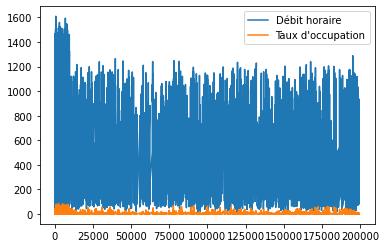

In [61]:
df[['Débit horaire', "Taux d'occupation"]].plot()

<AxesSubplot:ylabel='Débit horaire'>

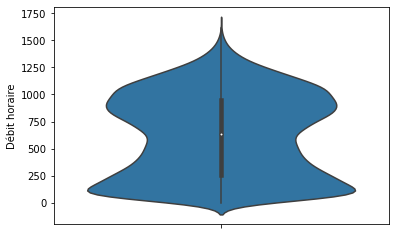

In [62]:
sns.violinplot(y='Débit horaire', data=df)

<AxesSubplot:ylabel="Taux d'occupation">

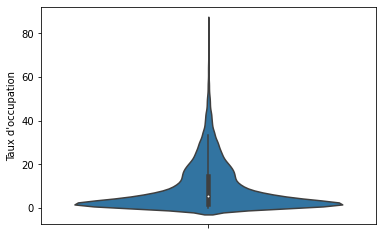

In [63]:
sns.violinplot(y="Taux d'occupation", data=df)

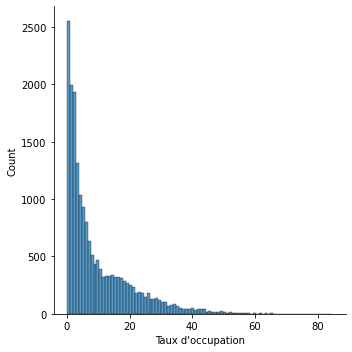

In [64]:
sns.displot(df, x="Taux d'occupation")

# Feature engineering

## Categorical variables

Ajoutons un *one-hot encoding* pour les variables catégoriques. On n'oubliera cependant pas de passer à un *dummy encoding* avant d'entraîner le modèle pour éviter un problème de dimension. ‼️

In [65]:
df.dtypes

Libelle                              object
Date et heure de comptage    datetime64[ns]
Débit horaire                       float64
Taux d'occupation                   float64
Etat trafic                          object
Etat arc                             object
filename                             object
dtype: object

**Ordinal encoding :**

Il semble en réalité plus pertinent d'utiliser un *ordinal encoding* pour donner une relation d'ordre à la feature. On se servira pour cela des informations contenues dans la notice.
<img src="ressources/ordinal_encoding.png" />

In [66]:
 df['Etat trafic']

0         Fluide
1         Fluide
2         Fluide
3         Fluide
4         Fluide
           ...  
199445    Fluide
199525    Fluide
199526    Fluide
199544    Fluide
199545    Fluide
Name: Etat trafic, Length: 18851, dtype: object

In [67]:
mapper = {'Inconnu': 0, 'Fluide': 1, 'Pré-saturé': 2, 'Saturé': 3, 'Bloqué': 4}
df['Etat trafic'] = df['Etat trafic'].map(mapper)
df.sample(5)

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc,filename
3379,AV_Champs_Elysees,2019-12-06 14:00:00,951.0,41.97056,3,Invalide,champs-elysees.csv
5783,AV_Champs_Elysees,2020-08-13 16:00:00,843.0,14.77278,1,Invalide,champs-elysees.csv
8396,AV_Champs_Elysees,2020-10-01 00:00:00,496.0,5.76556,1,Invalide,champs-elysees.csv
1735,AV_Champs_Elysees,2020-11-06 00:00:00,138.0,1.39556,1,Invalide,champs-elysees.csv
8914,AV_Champs_Elysees,2019-11-28 01:00:00,766.0,11.33222,1,Invalide,champs-elysees.csv


## Features liées aux timestamp

Ajout du jour (sans l'heure) :

In [68]:
df['Date'] = pd.to_datetime(df["Date et heure de comptage"]).dt.date
df.sample(5)

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc,filename,Date
26951,Convention,2020-09-07 21:00:00,541.0,2.64167,1,Invalide,convention.csv,2020-09-07
79080,Convention,2020-08-25 03:00:00,72.0,0.24445,1,Invalide,convention.csv,2020-08-25
5033,AV_Champs_Elysees,2020-08-22 19:00:00,1065.0,24.03167,2,Invalide,champs-elysees.csv,2020-08-22
8167,AV_Champs_Elysees,2020-03-30 01:00:00,34.0,0.53555,1,Invalide,champs-elysees.csv,2020-03-30
5764,AV_Champs_Elysees,2020-08-19 11:00:00,736.0,8.96167,1,Invalide,champs-elysees.csv,2020-08-19


Ajout du jour de la semaine:

In [70]:
df['Jour de la semaine'] = pd.to_datetime(df["Date et heure de comptage"]).dt.dayofweek
df.sample(5)

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc,filename,Date,Jour de la semaine
2085,AV_Champs_Elysees,2020-05-23 08:00:00,304.0,3.34889,1,Invalide,champs-elysees.csv,2020-05-23,5
42343,Convention,2020-11-11 10:00:00,275.0,1.84667,1,Invalide,convention.csv,2020-11-11,2
8301,AV_Champs_Elysees,2020-01-26 23:00:00,747.0,11.76278,1,Invalide,champs-elysees.csv,2020-01-26,6
179362,Convention,2020-02-22 03:00:00,379.0,2.26667,1,Invalide,convention.csv,2020-02-22,5
48775,Convention,2019-12-06 07:00:00,485.0,2.95222,1,Invalide,convention.csv,2019-12-06,4


Reste maintenant à one-hot encoder cette variable.  
‼️ On pensera à drop un des 7 jours pour éviter des problèmes d'overfitting ‼️

In [82]:
pd.concat(
    [df, pd.get_dummies(df['Jour de la semaine'], prefix='Jour de la semaine', drop_first=False)],
    axis=1
).drop(columns=['Jour de la semaine'])

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc,filename,Date,Jour de la semaine_0,Jour de la semaine_1,Jour de la semaine_2,Jour de la semaine_3,Jour de la semaine_4,Jour de la semaine_5,Jour de la semaine_6
0,AV_Champs_Elysees,2020-12-01 04:00:00,108.0,0.41722,1,Invalide,champs-elysees.csv,2020-12-01,0,1,0,0,0,0,0
1,AV_Champs_Elysees,2020-12-01 09:00:00,1279.0,13.58000,1,Invalide,champs-elysees.csv,2020-12-01,0,1,0,0,0,0,0
2,AV_Champs_Elysees,2020-11-02 05:00:00,144.0,2.25611,1,Invalide,champs-elysees.csv,2020-11-02,1,0,0,0,0,0,0
3,AV_Champs_Elysees,2020-11-01 23:00:00,245.0,8.11222,1,Invalide,champs-elysees.csv,2020-11-01,0,0,0,0,0,0,1
4,AV_Champs_Elysees,2020-12-01 23:00:00,236.0,2.56222,1,Invalide,champs-elysees.csv,2020-12-01,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199445,Convention,2020-05-30 22:00:00,481.0,2.71445,1,Invalide,convention.csv,2020-05-30,0,0,0,0,0,1,0
199525,Convention,2020-06-01 01:00:00,175.0,0.85389,1,Invalide,convention.csv,2020-06-01,1,0,0,0,0,0,0
199526,Convention,2020-06-01 00:00:00,287.0,1.61056,1,Invalide,convention.csv,2020-06-01,1,0,0,0,0,0,0
199544,Convention,2020-06-01 02:00:00,117.0,0.50333,1,Invalide,convention.csv,2020-06-01,1,0,0,0,0,0,0


## Périodes de vacances

## Confinement

D'après Wikipedia:
>L'interdiction de déplacement en France, vulgarisée dans les médias par l'expression « confinement de la population » ou « confinement national », est une mesure sanitaire mise en place pour la première fois du 17 mars à 12 h au 11 mai 2020 (55 jours, soit 1 mois et 25 jours), et une deuxième fois à partir du 30 octobre 2020 au 15 décembre 2020 (soit 1 mois et 18 jours), s'insère dans un ensemble de politiques de restrictions de contacts humains et de déplacements en réponse à la pandémie de Covid-19 en France.

L'objectif est de donner une valeur qui traduit l'intensité du confinement.  
  
Nous allons donc créer une feature `Etat du confinement` qui traduira l'intensité de ce dernier. Elle prendra les valeurs suivantes :
- 0 -> période avant le 1er confinement
- 1 -> pas de confinement mais avec expérience du 1er confinement et mesures d'hygiènes renforcées
- 2 -> confinement assoupli (réouverture des commerces non-essentiels notamment)
- 3 -> confinement total.

In [30]:
confinement_1 = pd.date_range(start='3/17/2020', end='5/11/2020')
confinement_2 = pd.date_range(start='10/30/2020', end='11/28/2020')
confinement_2_assoupli = pd.date_range(start='11/28/2020', end='12/15/2020')

In [31]:
# create a list of our conditions
conditions = [
    (df["Date et heure de comptage"] < confinement_1[0]), # 0
    (confinement_1[0] <= df["Date et heure de comptage"]) & (df["Date et heure de comptage"] < confinement_1[-1]), # 3
    (confinement_1[-1] <= df["Date et heure de comptage"]) & (df["Date et heure de comptage"] < confinement_2[0]), # 1
    (confinement_2[0] <= df["Date et heure de comptage"]) & (df["Date et heure de comptage"] < confinement_2[-1]), # 3
    (confinement_2_assoupli[0] <= df["Date et heure de comptage"]) & (df["Date et heure de comptage"] < confinement_2_assoupli[-1]), # 2
    (confinement_2_assoupli[-1] <= df["Date et heure de comptage"]) # 1
    ]

# create a list of the values we want to assign for each condition
values = [0, 3, 1, 3, 2, 1]

# create a new column and use np.select to assign values to it using our lists as arguments
df['Etat du confinement'] = np.select(conditions, values)
df.sample(5)

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc,filename,Date,Jour de la semaine,Etat du confinement
169580,Convention,2020-10-28 04:00:00,26.0,0.20889,1,Invalide,convention.csv,2020-10-28,2,1
6872,AV_Champs_Elysees,2020-10-24 02:00:00,68.0,0.86389,1,Invalide,champs-elysees.csv,2020-10-24,5,1
75040,Convention,2020-09-04 16:00:00,964.0,24.20723,2,Invalide,convention.csv,2020-09-04,4,1
194878,Convention,2020-06-27 04:00:00,205.0,1.02834,1,Invalide,convention.csv,2020-06-27,5,1
158983,Convention,2020-09-11 21:00:00,686.0,3.67222,1,Invalide,convention.csv,2020-09-11,4,1


In [32]:
df['Etat du confinement'].value_counts()

1    8159
0    6450
3    4000
2     242
Name: Etat du confinement, dtype: int64

## Couvre-feu

In [33]:
couvre_feu_start = pd.Timestamp('10/17/2020')
couvre_feu_start

Timestamp('2020-10-17 00:00:00')

In [34]:
df['Couvre-feu'] = (couvre_feu_start <= df['Date'])
df.sample(5)

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc,filename,Date,Jour de la semaine,Etat du confinement,Couvre-feu
89279,Convention,2019-12-12 06:00:00,211.0,0.91389,1,Invalide,convention.csv,2019-12-12,3,0,False
139513,Convention,2020-10-22 14:00:00,800.0,6.54667,1,Invalide,convention.csv,2020-10-22,3,1,True
100030,Convention,2020-01-21 00:00:00,549.0,2.45000,1,Invalide,convention.csv,2020-01-21,1,0,False
4802,AV_Champs_Elysees,2020-06-17 11:00:00,1233.0,17.04056,2,Invalide,champs-elysees.csv,2020-06-17,2,1,False
1496,AV_Champs_Elysees,2020-06-02 11:00:00,1156.0,18.46445,2,Invalide,champs-elysees.csv,2020-06-02,1,1,False


## Jours fériés

Le CSV a été obtenu via le lien suivant :  
- https://www.data.gouv.fr/en/datasets/jours-feries-en-france/

In [35]:
df_feries = pd.read_csv('data/jours_feries_metropole.csv')
df_feries.head()

,date,annee,zone,nom_jour_ferie
0,2000-01-01,2000,Métropole,1er janvier
1,2000-04-24,2000,Métropole,Lundi de Pâques
2,2000-05-01,2000,Métropole,1er mai
3,2000-05-08,2000,Métropole,8 mai
4,2000-06-01,2000,Métropole,Ascension


In [36]:
# On ne garde que les lignes relatives à 2019 ou 2020
df_feries = df_feries[df_feries['annee'].isin(['2019', '2020'])]
df_feries.sample(5)

,date,annee,zone,nom_jour_ferie
220,2020-01-01,2020,Métropole,1er janvier
214,2019-06-10,2019,Métropole,Lundi de Pentecôte
221,2020-04-13,2020,Métropole,Lundi de Pâques
226,2020-07-14,2020,Métropole,14 juillet
219,2019-12-25,2019,Métropole,Jour de Noël


In [37]:
def get_date(row):
    return row.date()

df_feries['date'] = pd.to_datetime(df_feries['date']).apply(get_date)
series_feries = df_feries['date']

In [38]:
df['Jour férié'] = df['Date'].isin(series_feries)
df['Jour férié'].value_counts()

False    18237
True       614
Name: Jour férié, dtype: int64

In [39]:
df.head()

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc,filename,Date,Jour de la semaine,Etat du confinement,Couvre-feu,Jour férié
0,AV_Champs_Elysees,2020-12-01 04:00:00,108.0,0.41722,1,Invalide,champs-elysees.csv,2020-12-01,1,2,True,False
1,AV_Champs_Elysees,2020-12-01 09:00:00,1279.0,13.58000,1,Invalide,champs-elysees.csv,2020-12-01,1,2,True,False
2,AV_Champs_Elysees,2020-11-02 05:00:00,144.0,2.25611,1,Invalide,champs-elysees.csv,2020-11-02,0,3,True,False
3,AV_Champs_Elysees,2020-11-01 23:00:00,245.0,8.11222,1,Invalide,champs-elysees.csv,2020-11-01,6,3,True,True
4,AV_Champs_Elysees,2020-12-01 23:00:00,236.0,2.56222,1,Invalide,champs-elysees.csv,2020-12-01,1,2,True,False


## Vacances scolaires

Le CSV a été obtenu via le lien suivant :  
- https://www.data.gouv.fr/en/datasets/le-calendrier-scolaire/

In [41]:
df_vacances = pd.read_csv('data/fr-en-calendrier-scolaire.csv', sep=';')
df_vacances.head()

,description,population,start_date,end_date,location,zones,annee_scolaire
0,Vacances de Printemps,NaN,2019-04-13,2019-04-29,Besançon,Zone A,2018-2019
1,Vacances d'Été,Enseignants,2019-07-06,2019-08-30,Besançon,Zone A,2018-2019
2,Pont de l'Ascension,NaN,2020-05-20,2020-05-25,Besançon,Zone A,2019-2020
3,Vacances de Noël,NaN,2020-12-19,2021-01-04,Besançon,Zone A,2020-2021
4,Pont de l'Ascension,NaN,2021-05-13,2021-05-17,Besançon,Zone A,2020-2021


In [42]:
df_vacances = df_vacances[df_vacances['location'] == 'Paris']
df_vacances.head()

,description,population,start_date,end_date,location,zones,annee_scolaire
102,Vacances d'Été,Élèves,2018-07-07,2018-09-03,Paris,Zone C,2017-2018
103,Vacances de la Toussaint,NaN,2018-10-20,2018-11-05,Paris,Zone C,2018-2019
104,Vacances de Noël,NaN,2019-12-21,2020-01-06,Paris,Zone C,2019-2020
105,Vacances d'Hiver,NaN,2020-02-08,2020-02-24,Paris,Zone C,2019-2020
280,Vacances de Noël,NaN,2017-12-23,2018-01-08,Paris,Zone C,2017-2018


In [43]:
df_vacances = df_vacances[df_vacances['annee_scolaire'].isin(['2019-2020', '2020-2021'])]
df_vacances.head()

,description,population,start_date,end_date,location,zones,annee_scolaire
104,Vacances de Noël,NaN,2019-12-21,2020-01-06,Paris,Zone C,2019-2020
105,Vacances d'Hiver,NaN,2020-02-08,2020-02-24,Paris,Zone C,2019-2020
284,Vacances d'Été,NaN,2020-07-04,2020-09-01,Paris,Zone C,2019-2020
285,Vacances d'Été,NaN,2021-07-05,NaN,Paris,Zone C,2020-2021
474,Vacances de Printemps,NaN,2020-04-04,2020-04-20,Paris,Zone C,2019-2020


On observe un NaN... Affichons toute le DataFrame comme il n'y a que peu de lignes.

In [44]:
df_vacances

,description,population,start_date,end_date,location,zones,annee_scolaire
104,Vacances de Noël,NaN,2019-12-21,2020-01-06,Paris,Zone C,2019-2020
105,Vacances d'Hiver,NaN,2020-02-08,2020-02-24,Paris,Zone C,2019-2020
284,Vacances d'Été,NaN,2020-07-04,2020-09-01,Paris,Zone C,2019-2020
285,Vacances d'Été,NaN,2021-07-05,NaN,Paris,Zone C,2020-2021
474,Vacances de Printemps,NaN,2020-04-04,2020-04-20,Paris,Zone C,2019-2020
475,Pont de l'Ascension,NaN,2020-05-20,2020-05-25,Paris,Zone C,2019-2020
476,Vacances de Noël,NaN,2020-12-19,2021-01-04,Paris,Zone C,2020-2021
660,Vacances d'Hiver,NaN,2021-02-13,2021-03-01,Paris,Zone C,2020-2021
845,Vacances de la Toussaint,NaN,2019-10-19,2019-11-04,Paris,Zone C,2019-2020
846,Vacances de la Toussaint,NaN,2020-10-17,2020-11-02,Paris,Zone C,2020-2021


Le seul NaN ne correpond pas à une date comprise dans notre étude. On peut donc la drop sereinement.

In [45]:
df_vacances = df_vacances[~ df_vacances['end_date'].isna()]
df_vacances

,description,population,start_date,end_date,location,zones,annee_scolaire
104,Vacances de Noël,NaN,2019-12-21,2020-01-06,Paris,Zone C,2019-2020
105,Vacances d'Hiver,NaN,2020-02-08,2020-02-24,Paris,Zone C,2019-2020
284,Vacances d'Été,NaN,2020-07-04,2020-09-01,Paris,Zone C,2019-2020
474,Vacances de Printemps,NaN,2020-04-04,2020-04-20,Paris,Zone C,2019-2020
475,Pont de l'Ascension,NaN,2020-05-20,2020-05-25,Paris,Zone C,2019-2020
476,Vacances de Noël,NaN,2020-12-19,2021-01-04,Paris,Zone C,2020-2021
660,Vacances d'Hiver,NaN,2021-02-13,2021-03-01,Paris,Zone C,2020-2021
845,Vacances de la Toussaint,NaN,2019-10-19,2019-11-04,Paris,Zone C,2019-2020
846,Vacances de la Toussaint,NaN,2020-10-17,2020-11-02,Paris,Zone C,2020-2021
847,Vacances de Printemps,NaN,2021-04-17,2021-05-03,Paris,Zone C,2020-2021


In [46]:
df_vacances.dtypes

description       object
population        object
start_date        object
end_date          object
location          object
zones             object
annee_scolaire    object
dtype: object

In [47]:
df_vacances['start_date'] = pd.to_datetime(df_vacances['start_date'])
df_vacances['end_date'] = pd.to_datetime(df_vacances['end_date'])

df_vacances.dtypes

/Users/Tony/opt/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Tony/opt/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


description               object
population                object
start_date        datetime64[ns]
end_date          datetime64[ns]
location                  object
zones                     object
annee_scolaire            object
dtype: object

On peut maintenant ajouter notre colonne `Vacances scolaires` à notre DataFrame de départ.

In [48]:
def est_pendant_vacances(date):    
    for index, row_vacances in df_vacances.iterrows():
        start = row_vacances['start_date']
        end = row_vacances['end_date']
        
        if start < date < end:
            return True
        else:
            pass
    
    return False

df['Vacances scolaires'] = df['Date'].apply(est_pendant_vacances)
df.sample(5)

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc,filename,Date,Jour de la semaine,Etat du confinement,Couvre-feu,Jour férié,Vacances scolaires
83689,Convention,2020-09-21 16:00:00,947.0,6.98667,1,Invalide,convention.csv,2020-09-21,0,1,False,False,False
602,AV_Champs_Elysees,2020-03-14 13:00:00,841.0,12.43889,1,Invalide,champs-elysees.csv,2020-03-14,5,0,False,False,False
44699,Convention,2020-09-14 13:00:00,821.0,4.97333,1,Invalide,convention.csv,2020-09-14,0,1,False,False,False
3985,AV_Champs_Elysees,2020-08-25 15:00:00,969.0,19.89389,2,Invalide,champs-elysees.csv,2020-08-25,1,1,False,False,True
533,AV_Champs_Elysees,2020-09-07 03:00:00,144.0,1.77944,1,Invalide,champs-elysees.csv,2020-09-07,0,1,False,False,False


## Temps avant les prochaines grandes vacances scolaires

Déjà, créons un DataFrame avec uniquement les grandes vacances.

In [49]:
df_grandes_vacances = df_vacances[df_vacances['description'].str.contains('Vacances')]
df_grandes_vacances.head()

,description,population,start_date,end_date,location,zones,annee_scolaire
104,Vacances de Noël,NaN,2019-12-21,2020-01-06,Paris,Zone C,2019-2020
105,Vacances d'Hiver,NaN,2020-02-08,2020-02-24,Paris,Zone C,2019-2020
284,Vacances d'Été,NaN,2020-07-04,2020-09-01,Paris,Zone C,2019-2020
474,Vacances de Printemps,NaN,2020-04-04,2020-04-20,Paris,Zone C,2019-2020
476,Vacances de Noël,NaN,2020-12-19,2021-01-04,Paris,Zone C,2020-2021


On trie maintenant ce DataFrame par ordre chronologique.

In [50]:
df_grandes_vacances = df_grandes_vacances.sort_values(by=['start_date'])
df_grandes_vacances.head()

,description,population,start_date,end_date,location,zones,annee_scolaire
845,Vacances de la Toussaint,NaN,2019-10-19,2019-11-04,Paris,Zone C,2019-2020
104,Vacances de Noël,NaN,2019-12-21,2020-01-06,Paris,Zone C,2019-2020
105,Vacances d'Hiver,NaN,2020-02-08,2020-02-24,Paris,Zone C,2019-2020
474,Vacances de Printemps,NaN,2020-04-04,2020-04-20,Paris,Zone C,2019-2020
284,Vacances d'Été,NaN,2020-07-04,2020-09-01,Paris,Zone C,2019-2020


In [51]:
# create a list of our conditions
conditions = []

# create a list of the values we want to assign for each condition
values = []

for idx, row in df_grandes_vacances.iterrows():
    conditions.append(df["Date et heure de comptage"] < row['start_date'])
    values.append(row['start_date'])

df['Date des prochaines vacances scolaires'] = np.select(conditions, values)
df['Date des prochaines vacances scolaires'] = df['Date des prochaines vacances scolaires']
df.sample(5)

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc,filename,Date,Jour de la semaine,Etat du confinement,Couvre-feu,Jour férié,Vacances scolaires,Date des prochaines vacances scolaires
95007,Convention,2020-04-18 11:00:00,278.0,1.69000,1,Invalide,convention.csv,2020-04-18,5,3,False,False,True,2020-07-04
110040,Convention,2020-09-22 18:00:00,1031.0,18.41222,2,Invalide,convention.csv,2020-09-22,1,1,False,False,False,2020-10-17
82005,Convention,2020-02-08 21:00:00,759.0,4.92389,1,Invalide,convention.csv,2020-02-08,5,0,False,False,False,2020-04-04
3243,AV_Champs_Elysees,2020-01-02 13:00:00,1146.0,31.71334,3,Invalide,champs-elysees.csv,2020-01-02,3,0,False,False,True,2020-02-08
7944,AV_Champs_Elysees,2020-04-22 19:00:00,237.0,2.48500,1,Invalide,champs-elysees.csv,2020-04-22,2,3,False,False,False,2020-07-04


In [52]:
df['Temps avant les prochaines vacances scolaires'] = df['Date des prochaines vacances scolaires'] - df['Date et heure de comptage']
df.sample(5)

,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc,filename,Date,Jour de la semaine,Etat du confinement,Couvre-feu,Jour férié,Vacances scolaires,Date des prochaines vacances scolaires,Temps avant les prochaines vacances scolaires
9414,AV_Champs_Elysees,2020-05-28 22:00:00,747.0,9.54111,1,Invalide,champs-elysees.csv,2020-05-28,3,1,False,False,False,2020-07-04,36 days 02:00:00
41523,Convention,2020-03-03 06:00:00,130.0,0.71333,1,Invalide,convention.csv,2020-03-03,1,0,False,False,False,2020-04-04,31 days 18:00:00
170805,Convention,2020-08-31 02:00:00,78.0,0.35111,1,Invalide,convention.csv,2020-08-31,0,1,False,False,True,2020-10-17,46 days 22:00:00
7734,AV_Champs_Elysees,2020-02-28 19:00:00,1141.0,35.02889,3,Invalide,champs-elysees.csv,2020-02-28,4,0,False,False,False,2020-04-04,35 days 05:00:00
3357,AV_Champs_Elysees,2019-12-04 16:00:00,1013.0,47.76500,3,Invalide,champs-elysees.csv,2019-12-04,2,0,False,False,False,2019-12-21,16 days 08:00:00


## Données météorologiques

# Analyse et visualisation (partie 2)

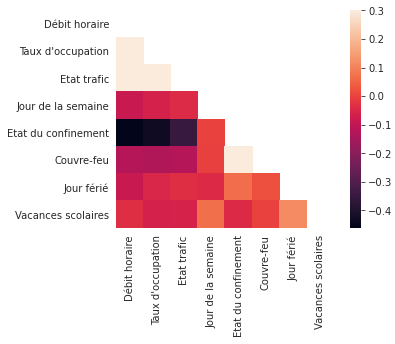

In [53]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

# Export train / dev / test

In [58]:
df['Date et heure de comptage'].iloc[0]

Timestamp('2020-12-01 04:00:00')

In [61]:
df[df['filename']=='champs-elysees.csv'].to_pickle('data/champs-elysees-cleaned.pkl')

In [55]:
#print(f'% train: {len(df_train) / len(df)}')
#print(f'% dev: {len(df_dev) / len(df)}')
#print(f'% test: {len(df_test) / len(df)}')